Данные

Игра содержит особое событие – ивент, для прохождения которого пользователи могут тратить деньги. Группа дизайнеров решила поменять вид окошка покупки ивентовых продуктов. Чтобы оценить результат нововведения, провели АБ тест, разделив пользователей на две группы: контрольную и тестовую (с окошком нового типа).

Задача
Исследовать какая из АБ групп лучше себя показала. Результаты предоставить в понятной для широкой аудитории форме, сопроводив по необходимости графиками/дашбордами/числами. Колонки

AbGroup – имя АБ группы: Control/Test
user_id – id пользователя
time_stamp – день события
install_date – день установки приложения пользователем
event_name – техническое название события (InAppPurchase - в случае покупки за деньги, ResourceSpend в случае покупки за игровую валюту)
platform – платформа google / itunes
network_name – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)
country_name – страна пользователя
InGameTime – сколько всего пользователь провел в игре секунд
LastCompletedLevel – номер последнего пройденного уровня
avg_energy_amount – сколько в среднем энергии было у пользователя за день
revenue_on_event – ревеню, потраченное на покупку ивентовых продуктов
revenue_on_other_activities – ревеню, потраченное на остальные продукты, включая золото
gold_on_event – золото, потраченное на ивентный прогресс
gold_on_other_activities – золото, потраченное на другие продукты

*Грузим данные и библиотеки*

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [2]:
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('C:/Jupyter/test_task_product_analyst_2021_20210427.csv')
df.head(7)

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN
5,Control,203a74059afce17b1ae5e19cab1147faf8d20010,2020-02-21,2019-01-22,ResourceSpend,itunes,Paid,France,361720,1193,30.0,0.0,0.0,NaN,NaN
6,Control,faba7453a9c06c9e1bd039057cf4b72a36ee55a8,2020-02-28,2019-09-09,ResourceSpend,itunes,Paid,Germany,744718,893,29.0,0.0,0.0,NaN,NaN


In [4]:
df.shape

(696840, 15)

In [62]:
df_ab = df.AbGroup.value_counts()
n_control = df_ab[0]
n_test = df_ab[1]

In [63]:
n_control, n_test

(558070, 138770)

In [6]:
df.columns

Index(['AbGroup', 'user_id', 'time_stamp', 'install_date', 'event_name',
       'platform', 'network_name', 'country_name', 'InGameTime',
       'LastCompletedLevel', 'avg_energy_amount', 'revenue_on_event',
       'revenue_on_other_activities', 'gold_on_event',
       'gold_on_other_activities'],
      dtype='object')

In [7]:
for i in df[['event_name','platform','network_name','country_name']]:
    print(df[i].value_counts())

ResourceSpend    696840
Name: event_name, dtype: int64
itunes    696840
Name: platform, dtype: int64
Paid       439996
Organic    256844
Name: network_name, dtype: int64
United Kingdom of Great Britain and Northern Ireland    186128
Germany                                                 170723
France                                                  158221
Canada                                                   85545
Spain                                                    78396
                                                         ...  
Guinea                                                       1
Iceland                                                      1
Gibraltar                                                    1
Malawi                                                       1
Cyprus                                                       1
Name: country_name, Length: 115, dtype: int64


In [8]:
df.dtypes

AbGroup                         object
user_id                         object
time_stamp                      object
install_date                    object
event_name                      object
platform                        object
network_name                    object
country_name                    object
InGameTime                       int64
LastCompletedLevel               int64
avg_energy_amount              float64
revenue_on_event               float64
revenue_on_other_activities    float64
gold_on_event                  float64
gold_on_other_activities       float64
dtype: object

*Переводим временные данные в формат datetime*

In [9]:
for i in df[['time_stamp','install_date']]:
    df[i] = pd.to_datetime(df[i])
df.dtypes    

AbGroup                                object
user_id                                object
time_stamp                     datetime64[ns]
install_date                   datetime64[ns]
event_name                             object
platform                               object
network_name                           object
country_name                           object
InGameTime                              int64
LastCompletedLevel                      int64
avg_energy_amount                     float64
revenue_on_event                      float64
revenue_on_other_activities           float64
gold_on_event                         float64
gold_on_other_activities              float64
dtype: object

In [10]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [11]:
df.isnull().sum()

AbGroup                             0
user_id                             0
time_stamp                          0
install_date                        0
event_name                          0
platform                            0
network_name                        0
country_name                        0
InGameTime                          0
LastCompletedLevel                  0
avg_energy_amount                   0
revenue_on_event                    0
revenue_on_other_activities         0
gold_on_event                  651428
gold_on_other_activities       528647
dtype: int64

*определим период тестирования*

In [12]:
min(df.time_stamp), max(df.time_stamp)

(Timestamp('2020-02-06 00:00:00'), Timestamp('2020-03-04 00:00:00'))

<AxesSubplot:>

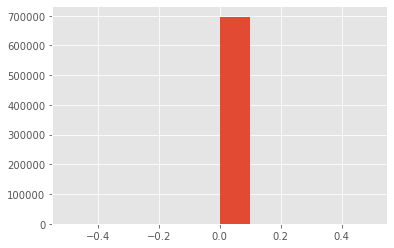

In [13]:
df.revenue_on_event.hist()

In [14]:
df[df['AbGroup']=='Control'].revenue_on_event.mean(),df[df['AbGroup']=='Test'].revenue_on_event.mean()

(0.0, 0.0)

In [15]:
df[df['AbGroup']=='Control'].revenue_on_other_activities.mean(), df[df['AbGroup']=='Test'].revenue_on_other_activities.mean()

(0.0, 0.0)

In [16]:
df[df['revenue_on_event']>0].shape, df[df['revenue_on_other_activities']>0].shape

((0, 15), (0, 15))

<AxesSubplot:>

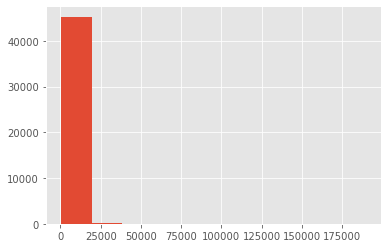

In [17]:
df.gold_on_event.hist()

In [18]:
df[df['AbGroup']=='Control'].gold_on_event.mean(),df[df['AbGroup']=='Test'].gold_on_event.mean()

(1965.2116583798038, 2104.6065046065046)

In [19]:
(df.gold_on_event > 0).mean() 

0.06516847482922909

In [20]:
df_1 = df.fillna(0)
df_1.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,0.0,0.0
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,0.0,0.0
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,0.0,0.0
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,0.0,0.0
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,0.0


In [26]:
df_2 = df.groupby(['AbGroup','user_id']).agg({'gold_on_event' : ['sum', 'mean','median']})

In [27]:
df_2.head()

gold_on_event                
                                                           sum    mean  median
AbGroup user_id                                                               
Control 00000d6d79ec151d74c5b0c0705d9d9fe252fe83           0.0     NaN     NaN
        000133682d2dcd90c1a9c8ca5e34a294f31af64f        2500.0  1250.0  1250.0
        0001f13b0535b174bc7e36a1846c31c7a091c4b0           0.0     NaN     NaN
        00030f76fdb923292f29dfd06dd5a4ac6e5aaa7e           0.0     NaN     NaN
        00034f46e0922c7174676c439258e78aea4d6218           0.0     NaN     NaN

In [83]:
df_1.groupby('AbGroup', as_index=False).agg({'gold_on_event' : ['mean','median']})

AbGroup gold_on_event       
                    mean median
0  Control    128.191087    0.0
1     Test    136.631837    0.0

*H0 - средние контрольной и тестовой групп равные. H1 - не равны
С учетом огромного количества 0-й будем смотреть средние (медианы будут равны 0 с учетом конверсии)*

In [38]:
import scipy.stats

In [89]:
control_s = df_1[df_1['AbGroup']=='Control'].gold_on_event
test_s = df_1[df_1['AbGroup']=='Test'].gold_on_event

In [90]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = scipy.stats.norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = scipy.stats.norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

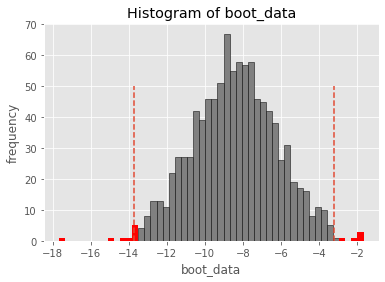

In [93]:
booted_data = get_bootstrap(control_s, test_s, bootstrap_conf_level = 0.99) # в результате хранится разница двух распределений, ДИ и pvalue

In [94]:
booted_data["p_value"] # альфа

0.00014625875243783504

*Т.к. 0 не находится в границах доверительного интервала, считаем изменение статистически значимым!!
Итоговый прирост трат золотых в среднем - 14 - 4 с учетом доверительного интервала 99%*